# 과제(~10/11)
1. EDA(성별에 따른 이탈률 등)
2. 결측치 처리 코드 짜기
3. 문자형 데이터 처리 코드, 스케일링 코드 짜기
...

- "이탈 고객 예측"

## 1. 환경설정

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')


## 2. 데이터 로드 및 확인
- y: Churn(지난 달 이탈고객)

In [28]:
path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(path)

In [29]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [30]:
df.shape

(7043, 21)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 3. 결측치 및 이상치 확인
- TotalCharges 공백 결측 11개 존재 -> 제거
- 이상치 없음

In [ ]:
# 결측치 확인
df.isna().sum()  # 결측치 없음(밑에 확인 필요)
# 1012회의: 데이터가 크면 isna 오래걸려서 그냥 함수 만들어서 na본다고 함

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
# 이상치 확인
## numeric(tenure, MonthlyCharges, TotalCharges)
num_x = df.loc[:, ['tenure', 'MonthlyCharges', 'TotalCharges']]

## TotalCharges의 Object to float 형변환 과정에서 공백으로 된 결측 발견
#num_x['TotalCharges'] = num_x['TotalCharges'].astype(float)

In [34]:
# 전체 데이터 중 일부이므로 삭제
len(num_x[num_x['TotalCharges'] == ' '])  # 총 11개
df_clean1 = df[df['TotalCharges'] != ' '].copy()

# TotalCharges 형변환
df_clean1['TotalCharges'] = df_clean1['TotalCharges'].astype(float)

In [35]:
# 이상치 확인 다시 진행
## numeric(tenure, MonthlyCharges, TotalCharges)
num_x = df_clean1.loc[:, ['tenure', 'MonthlyCharges', 'TotalCharges']]
num_x.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
## 1012 회의 추가사항

# describe()
# cnt변수? 생성
# countplot의 사용(성별의 경우 수 불균형 데이터가 아니니까 비율말고 단순 count로 봐도 괜찮을듯?)
# 시각화 결과를 제목에 같이 넣어보기
# EDA보여줄 때 수치적인 표+그래프 이렇게 보여주기(코랩 참고)
# 나머지 변수들도 동일하게 EDA하기
# int에 해당하는 변수들(tenure, MonthlyCharges, TotalCharges) 시각화
# 연속형 변수는 일단 히스토그램으로 그려보기(카테고리컬 변수는 막대 그래프가 디폴트!)
# 히스토그램 그려서 전반적인 분포 파악하기
# 멘토님의 경우 구간별로 나눔(ex. 1~100이면 10씩 쪼갬 or 구성비 비슷하게 맞춰서 쪼갬)
# bin(7단위로 나눔(편한대로)) 함수 만들어서 쓰심(코랩 참고)
# uniform binning(값 기준 비닝), 근데 값 기준 비닝이 특정 값만 많이 들어가고 그러면
# 구성비를 고려해서 하는 quantil? binning 을 함(거의 많이 사용, 보통 불균형 데이터가 많으니)
# 뭘 쓰든 내 맘이지만 왜 썼는지, 그 기준 이런걸 잘 설명하기
# 금융권은 WOA 비닝?? 꼭 찾아보기!!
# 상관관계도 보기
# 수치가 유의미한 차이인지(ex. 24% 26%) 통계적 검정으로도 보여주고, 그림으로도 같이 보여주는게 베스트!
# 컬럼 명세 작성하는거 배우기(count, na count, unique, type 등등 빨간 글씨 하신 부분 중요)
# 컬럼 명세 실무에서도 엑셀에 명세 정리하는지? ㅇㅇ 팀 사이트에 따로 하기도 하지만 엑셀에도 한다~
# information value도 꼭 찾아보기!! 모든 변수 EDA를 하기 보다는, y에 유의미한 변수들을 골라서 함(or 랜포나 light gbm 돌려서 상위에 나온 변수로 eda 하기도 함)
# 박스플롯은 금융 실무에서 잘 안 쓴다...
# 등등 코랩 참고
# 메타 데이터 참고 사이트(https://medium.com/@zulfikarirham02/telco-customer-churn-prediction-using-machine-learning-and-deep-learning-8d1905b04980)

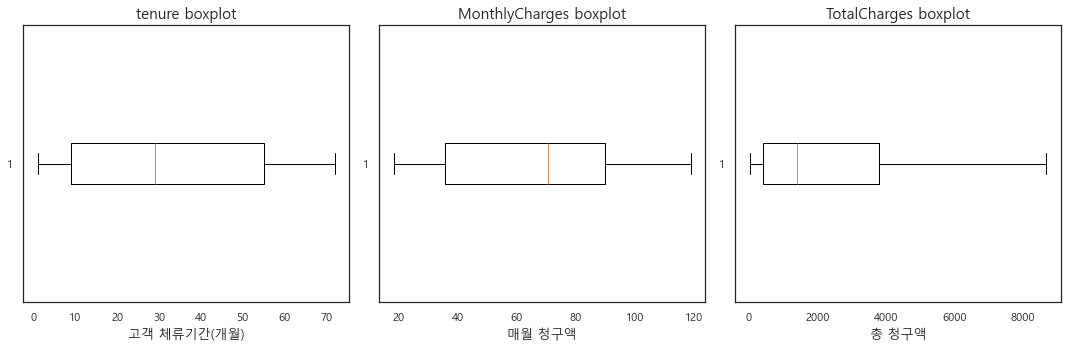

In [36]:
# 이상치 확인(boxplot)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
box_txt = ['고객 체류기간(개월)', '매월 청구액', '총 청구액']  # 후에 딕셔너리로 바꿔서 영<->한 만들어놔도 좋을듯

for i in range(len(num_x.columns)):
    ax[i].boxplot(num_x.iloc[:, i], vert=False)
    ax[i].set_title(f'{num_x.columns[i]} boxplot', size=15)
    ax[i].set_xlabel(box_txt[i], size=13)

plt.tight_layout()
plt.show()

- IQR 이상치 제거 기준에 걸리는 값은 없음

## 4. EDA

- 참고
    - SeniorCitizen: 시니어 고객 유무(1/0)
    - Partner: 고객의 파트너 유무(Y/N)
    - Dependents: 고객의 부양가족 유무(Y/N)
    - tenure: 고객 체류기간(개월)
    - PhoneService: 전화 서비스 이용 유무(Y/N)
    - MultipleLines: 다회선 보유 유무(Y/N/전화 서비스 없음)
    - InternetService: 인터넷 서비스 공급체(DSL/광섬유/No)
        - 광섬유는 일반적으로 더 빠르고 안정적이지만, 인프라 제약으로 인해 가용성은 낮음
        - DSL: 널리 사용, 저렴해서 일상적인 인터넷 사용에 적합
        - 광섬유: 고속 데이터 전송과 짧은 대기 시간이 필요한 기업 또는 사용자에게 적합

    - OnlineSecurity: 온라인 보안 사용 유무(Y/N/인터넷 서비스 없음)
    - OnlineBackup: 온라인 백업 보유 유무(Y/N/인터넷 서비스 없음)
    - DeviceProtection: 기기보호 기능 보유 유무(Y/N/인터넷 서비스 없음)
    - TechSupport: 기술 지원 유무(Y/N/인터넷 서비스 없음)
    - StreamingTV: 스트리밍TV 사용 유무(Y/N/인터넷 서비스 없음)
    - StreamingMovies: 스트리밍 영화 사용 유무(Y/N/인터넷 서비스 없음)
    - Contract: 고객 계약기간(월별, 1년, 2년)
    - PaperlessBilling: paperless 청구서 사용 유무(Y/N)
    - PaymentMethod: 결제 방법(전자수표, 우편수표, 은행송금(자동), 신용카드(자동))
    - MonthlyCharges: 매월 청구 금액
    - TotalCharges: 총 청구 금액
    - Churn: 고객 이탈 유무(Y/N)

### 4.1. 성별에 따른 이탈률(last month)
- 전처리 완료 데이터: df_clean1

In [108]:
# 성별 분포 파악 -> 불균형 데이터는 아님
df_clean1['gender'].value_counts()

# Male:0, Female:1로 변환
df_clean1['gender'] = df_clean1['gender'].replace({'Male':0, 'Female':1})

# Churn에서 No:0, Yes:1로 변환
df_clean1['Churn'] = df_clean1['Churn'].replace({'No':0, 'Yes':1})

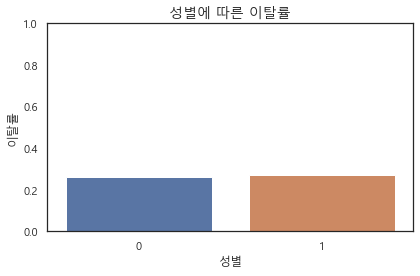

In [109]:
# 성별별 이탈률 계산
churn_rate = df_clean1.groupby('gender')['Churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(data=churn_rate, x='gender', y='Churn')

plt.title('성별에 따른 이탈률', fontsize=14)
plt.xlabel('성별', fontsize=12)
plt.ylabel('이탈률', fontsize=12)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

- 성별별로 눈에 띄게 큰 이탈률 차이는 없어 보인다.(통계적 검증은 옵션)

### 4.2. 파트너 유무에 따른 이탈률

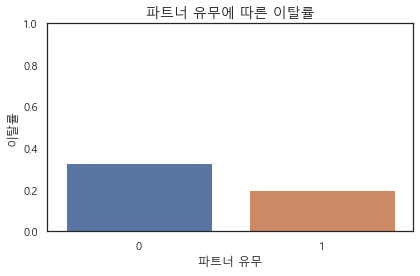

In [39]:
# No:0, Yes:1
le = LabelEncoder()
df_clean1['Partner'] = le.fit_transform(df_clean1['Partner'])

# 파트너 유무에 따른 이탈률 계산
ch_rate_partner = df_clean1.groupby('Partner')['Churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(data=ch_rate_partner, x='Partner', y='Churn')

plt.title('파트너 유무에 따른 이탈률', fontsize=14)
plt.xlabel('파트너 유무', fontsize=12)
plt.ylabel('이탈률', fontsize=12)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

- 파트너가 없는 사람의 이탈률이 좀 더 높은 것으로 보인다.

### 4.3. 부양가족 유무에 따른 이탈률
- (추가 data필요)부양가족이 많을수록 이탈률이 적은가?

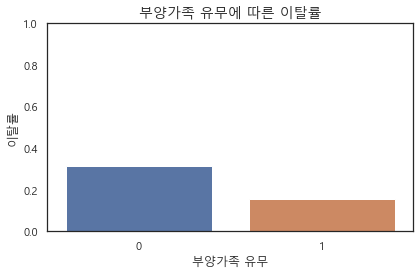

In [40]:
# No:0, Yes:1
le = LabelEncoder()
df_clean1['Dependents'] = le.fit_transform(df_clean1['Dependents'])

# 부양가족 유무에 따른 이탈률 계산
ch_rate_Dependents = df_clean1.groupby('Dependents')['Churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(data=ch_rate_Dependents, x='Dependents', y='Churn')

plt.title('부양가족 유무에 따른 이탈률', fontsize=14)
plt.xlabel('부양가족 유무', fontsize=12)
plt.ylabel('이탈률', fontsize=12)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

- 부양가족이 없는 사람의 이탈률이 좀 더 높은 것으로 보인다.

### 4.4. 체류기간에 따른 이탈률
- (H1) 체류기간이 길수록 이탈률은 적을 것이다.

In [ ]:
# 체류기간과 고객 이탈 간의 상관관계
corr = df_clean1['tenure'].corr(df_clean1['Churn'])
print(round(corr, 3))  # -0.354이므로 약한 음의 상관관계 존재

-0.354


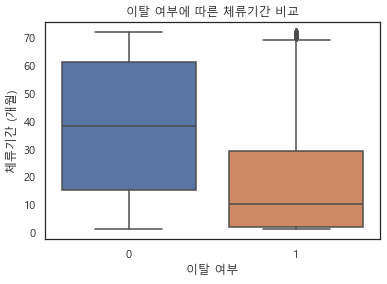

In [58]:
# 시각화
plt.figure(figsize=(6,4))
sns.boxplot(data=df_clean1, x='Churn', y='tenure')

plt.title('이탈 여부에 따른 체류기간 비교')
plt.xlabel('이탈 여부')
plt.ylabel('체류기간 (개월)')
plt.show()

- 일반적으로는 이탈한 사람의 체류기간이 더 짧다.
- 하지만 이탈한 사람의 일부는 체류기간이 매우 긴 이상치가 존재하여 확인이 필요하다.
- '이탈한 사람 -> 체류기간 짧음' 의 역이 성립하는 지는 확인이 필요하다.

### 4.5. 다회선 보유 유무에 따른 이탈률
- (H1) 회선이 많을수록 이탈률은 적을 것이다.

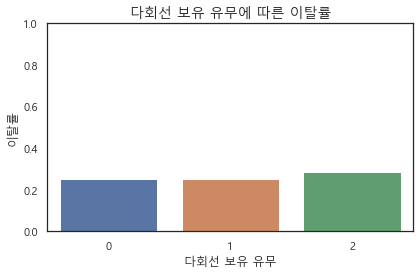

In [ ]:
# No:0, No phone service:1, Yes:2
le = LabelEncoder()
df_clean1['MultipleLines'] = le.fit_transform(df_clean1['MultipleLines'])

# 다회선 보유 유무에 따른 이탈률 계산
ch_rate_MultipleLines = df_clean1.groupby('MultipleLines')['Churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(data=ch_rate_MultipleLines, x='MultipleLines', y='Churn')

plt.title('다회선 보유 유무에 따른 이탈률', fontsize=14)
plt.xlabel('다회선 보유 유무', fontsize=12)
plt.ylabel('이탈률', fontsize=12)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

- 회선이 많을수록 오히려 이탈률이 조금 높은 경항을 보인다.

### 4.6. 인터넷 서비스 공급체에 따른 이탈률

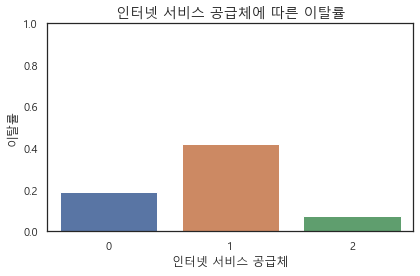

In [66]:
# DSL:0, Fiber optic:1, No:2
le = LabelEncoder()
df_clean1['InternetService'] = le.fit_transform(df_clean1['InternetService'])

# 인터넷 서비스 공급체에 따른 이탈률 계산
ch_rate_InternetService = df_clean1.groupby('InternetService')['Churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(data=ch_rate_InternetService, x='InternetService', y='Churn')

plt.title('인터넷 서비스 공급체에 따른 이탈률', fontsize=14)
plt.xlabel('인터넷 서비스 공급체', fontsize=12)
plt.ylabel('이탈률', fontsize=12)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

- DSL보다 광섬유 공급체를 사용하는 고객의 이탈률이 매우 높은 것으로 보인다.

### 4.7. 온라인 보안/백업/기기보호 사용 유무에 따른 이탈률

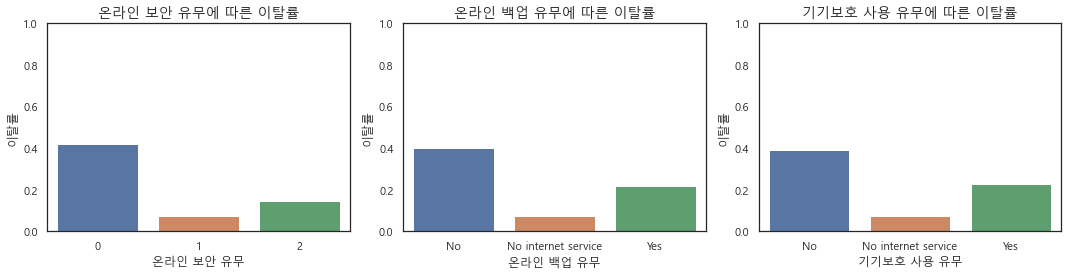

In [81]:
# 온라인 보안 유무에 따른 이탈률 계산
ch_rate_OnlineSecurity = df_clean1.groupby('OnlineSecurity')['Churn'].mean().reset_index()
# 온라인 백업 유무에 따른 이탈률 계산
ch_rate_OnlineBackup = df_clean1.groupby('OnlineBackup')['Churn'].mean().reset_index()
# 기기보호 사용 유무에 따른 이탈률 계산
ch_rate_DeviceProtection = df_clean1.groupby('DeviceProtection')['Churn'].mean().reset_index()


# 온라인 보안 유무에 따른 이탈률 시각화
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.barplot(data=ch_rate_OnlineSecurity, x='OnlineSecurity', y='Churn', ax=ax[0])

ax[0].set_title('온라인 보안 유무에 따른 이탈률', fontsize=14)
ax[0].set_xlabel('온라인 보안 유무', fontsize=12)
ax[0].set_ylabel('이탈률', fontsize=12)
ax[0].set_ylim(0, 1)


# 온라인 백업 유무에 따른 이탈률 시각화
sns.barplot(data=ch_rate_OnlineBackup, x='OnlineBackup', y='Churn', ax=ax[1])

ax[1].set_title('온라인 백업 유무에 따른 이탈률', fontsize=14)
ax[1].set_xlabel('온라인 백업 유무', fontsize=12)
ax[1].set_ylabel('이탈률', fontsize=12)
ax[1].set_ylim(0, 1)


# 기기보호 사용 유무에 따른 이탈률 시각화
sns.barplot(data=ch_rate_DeviceProtection, x='DeviceProtection', y='Churn', ax=ax[2])

ax[2].set_title('기기보호 사용 유무에 따른 이탈률', fontsize=14)
ax[2].set_xlabel('기기보호 사용 유무', fontsize=12)
ax[2].set_ylabel('이탈률', fontsize=12)
ax[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

- 온라인 보안, 백업, 기기보호를 사용하지 않는 고객의 이탈률이 더 높은 것으로 보인다.

### 4.8. 기술지원 유무에 따른 이탈률

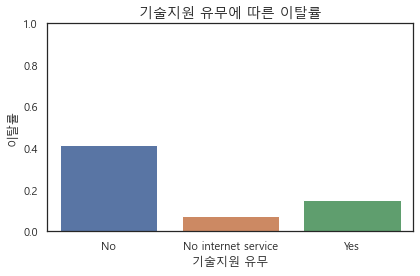

In [83]:
# 기술지원 유무에 따른 이탈률 계산
ch_rate_TechSupport = df_clean1.groupby('TechSupport')['Churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(data=ch_rate_TechSupport, x='TechSupport', y='Churn')

plt.title('기술지원 유무에 따른 이탈률', fontsize=14)
plt.xlabel('기술지원 유무', fontsize=12)
plt.ylabel('이탈률', fontsize=12)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

- 기술지원을 받지 않은 고객의 이탈률이 기술지원을 받는 고객보다 더 높은 것을 알 수 있다.

### 4.8. 스트리밍 TV/영화 사용 유무에 따른 이탈률

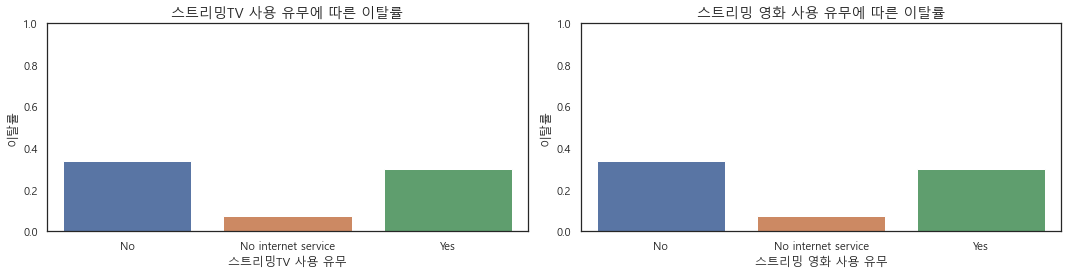

In [84]:
# 스트리밍TV 사용 유무에 따른 이탈률 계산
ch_rate_StreamingTV = df_clean1.groupby('StreamingTV')['Churn'].mean().reset_index()
# 스트리밍 영화 사용 유무에 따른 이탈률 계산
ch_rate_StreamingMovies = df_clean1.groupby('StreamingMovies')['Churn'].mean().reset_index()


# 스트리밍TV 사용 유무에 따른 이탈률 시각화
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(data=ch_rate_StreamingTV, x='StreamingTV', y='Churn', ax=ax[0])

ax[0].set_title('스트리밍TV 사용 유무에 따른 이탈률', fontsize=14)
ax[0].set_xlabel('스트리밍TV 사용 유무', fontsize=12)
ax[0].set_ylabel('이탈률', fontsize=12)
ax[0].set_ylim(0, 1)


# 스트리밍 영화 사용 유무에 따른 이탈률 시각화
sns.barplot(data=ch_rate_StreamingMovies, x='StreamingMovies', y='Churn', ax=ax[1])

ax[1].set_title('스트리밍 영화 사용 유무에 따른 이탈률', fontsize=14)
ax[1].set_xlabel('스트리밍 영화 사용 유무', fontsize=12)
ax[1].set_ylabel('이탈률', fontsize=12)
ax[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

- 스트리밍TV 또는 스트리밍 영화를 사용하지 않는 고객의 이탈률이 좀 더 높긴 하지만, 사용하는 고객과의 큰 이탈률 차이는 보이지 않는다.

### 4.9. 계약기간에 따른 이탈률
- (H1) 계약기간이 짧으면 이탈률이 클 것이다.

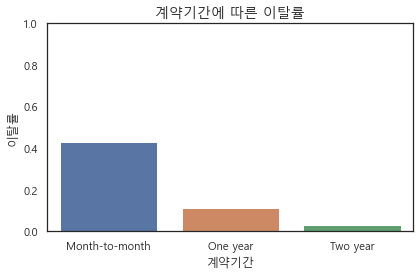

In [85]:
# 계약기간에 따른 이탈률 계산
ch_rate_Contract = df_clean1.groupby('Contract')['Churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(data=ch_rate_Contract, x='Contract', y='Churn')

plt.title('계약기간에 따른 이탈률', fontsize=14)
plt.xlabel('계약기간', fontsize=12)
plt.ylabel('이탈률', fontsize=12)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

- 월별로 갱신되는 계약, 1년 계약, 2년 계약 순으로 이탈률이 높은 것을 알 수 있다.
- 월별 갱신 계약의 이탈률이 상대적으로 매우 높기 때문에 해당 고객군에 대해 이탈률을 낮출 수 있는 방안이 필요할 것으로 생각된다.

### 4.10. 매월 청구액/총 청구액에 따른 이탈률
- (H1) 매월 청구액/총 청구액이 많을수록 이탈률이 클 것이다.

In [89]:
# 매월 청구액과 고객 이탈 간의 상관관계
corr = df_clean1['MonthlyCharges'].corr(df_clean1['Churn'])
print(round(corr, 3))  # 0.193이므로 상관관계가 거의 존재하지 않음

# 총 청구액과 고객 이탈 간의 상관관계
corr_tot = df_clean1['TotalCharges'].corr(df_clean1['Churn'])
print(round(corr_tot, 3))  # -0.199이므로 상관관계가 거의 존재하지 않음

0.193
-0.199


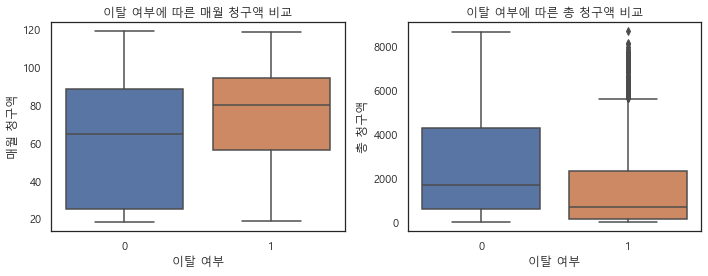

In [93]:
# 시각화
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# 매월 청구액
sns.boxplot(data=df_clean1, x='Churn', y='MonthlyCharges', ax=ax[0])
ax[0].set_title('이탈 여부에 따른 매월 청구액 비교')
ax[0].set_xlabel('이탈 여부')
ax[0].set_ylabel('매월 청구액')

# 총 청구액
sns.boxplot(data=df_clean1, x='Churn', y='TotalCharges', ax=ax[1])
ax[1].set_title('이탈 여부에 따른 총 청구액 비교')
ax[1].set_xlabel('이탈 여부')
ax[1].set_ylabel('총 청구액')

plt.tight_layout()
plt.show()

- 이탈 고객은 상대적으로 매월 청구액이 높은 경향을 보인다.
- 총 청구액의 경우, 이탈 고객에서 오히려 낮은 경향을 보이지만, 매우 큰 청구액(이상치)이 존재하므로, 추가적인 분석이 필요하다.
- 또한, '이탈 고객 -> 매월 청구액 비교적 높음'의 역이 성립하는지도 추가적인 확인이 필요하다.

## 5. 문자형 데이터 처리 및 스케일링

1. 문자형 데이터
- 라벨 인코딩
    - 트리계열 모델(DT, RF)에서 주로 사용
    - 트리계열 모델은 수치의 특성을 반영하지 않기 때문
- 원핫 인코딩
    - 선형 모델(LR, SVM 등)에서 사용
    - 선형 모델의 경우 수치가 가중치에 영향을 주기 때문

2. 수치형 데이터
- Min-Max Scailing
- StandardScaler
    - 이상치에 민감하므로 이상치가 많지 않은 데이터에 사용
    - 데이터가 정규분포에 가까울수록 좋음
    - 대부분 ML모델에 적합

In [98]:
# 중복이 없는 고객ID열은 삭제 가능(불필요)
df_clean1['customerID'].duplicated().sum()
df_clean2 = df_clean1.drop(columns='customerID').copy()

In [100]:
# 뒤에서 트리계열 모델을 사용할 예정이므로, 먼저 라벨 인코딩 진행
# df_clean2 기준 PhoneService, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod 필요
le = LabelEncoder()
cat_list = ['PhoneService', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for cat in cat_list:
    df_clean2[cat] = le.fit_transform(df_clean2[cat])

In [105]:
# 수치형 변수 스케일링
scaler = StandardScaler()
numc_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

df_clean2[numc_list] = scaler.fit_transform(df_clean2[numc_list])

In [107]:
df_clean2.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,0,0,1,1,-0.343137,1,2,0,2,0,2,2,2,2,1,1,3,0.664868,-0.129180,0
7039,1,0,1,1,1.612573,1,2,1,0,2,2,0,2,2,1,1,1,1.276493,2.241056,0
7040,1,0,1,1,-0.872808,0,1,0,2,0,0,0,0,0,0,1,2,-1.170004,-0.854514,0
7041,0,1,1,0,-1.158016,1,2,1,0,0,0,0,0,0,0,1,3,0.319168,-0.872095,1
7042,0,0,0,0,1.368109,1,0,1,2,0,2,2,2,2,2,1,0,1.357932,2.012344,0
